In [ ]:
# Exercise: 2.5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [78]:
class bandit:
    def __init__(self, epsilon, k, step_size, sample_averages = False, constant_step_size = False):
        self.epsilon = epsilon
        self.k = k
        self.q_estimates = np.zeros(k)
        self.actions = np.array(range(k))
        self.q_true = np.ones(k)
        self.times_taken = np.zeros(k)
        self.time = 0
        self.sample_averages = sample_averages
        self.constant_step_size = constant_step_size
        self.step_size = step_size

    
    # Returns the index of the action selected
    def select_action(self):
        x = np.random.uniform()
        if x < self.epsilon:
            return np.random.choice(self.actions)
        else:
            return np.argmax(self.q_estimates)
    
    # Get reward and update q_estimate using sample-average method
    def step(self, action):
        # Get return for action
        reward = np.random.normal(self.q_true[action], 1)
        
        # Increment t, times_taken[action]
        self.time += 1
        self.times_taken[action] += 1

        # Use Sample-averages method to update q_estimate
        if self.sample_averages:
            self.q_estimates[action] += 1.0/self.times_taken[action] * (reward - self.q_estimates[action])
            
        # Constant step-size update
        if self.constant_step_size:
            self.q_estimates[action] += self.step_size*(reward - self.q_estimates[action])   
        
        # Make problem nonstationary by adding noise to all q_true values for each step
        self.q_true = self.q_true + np.random.normal(0, 0.1, self.k)
        
        return reward
    
    # Reset bandit at the beginning of every run
    def reset(self):
        
        self.q_true = np.random.randn(self.k)
        
        self.q_estimates = np.zeros(self.k)
        
        self.times_taken = np.zeros(self.k)
        
        self.best_action = np.argmax(self.q_true)




In [72]:
def simulate(runs, time, bandits):
    best_action_counts = np.zeros((len(bandits), runs, time))
    rewards = np.zeros(best_action_counts.shape)
    for i, bandit in enumerate(bandits):
        for r in tqdm(range(runs)):
            bandit.reset()
            for t in range(time):
                action = bandit.select_action()
                reward = bandit.step(action)
                rewards[i, r, t] = reward
                if action == bandit.best_action:
                    best_action_counts[i, r, t] = 1
    best_action_counts = best_action_counts.mean(axis = 1)
    rewards = rewards.mean(axis = 1)
    return best_action_counts, rewards
   

In [81]:
def exercise_2_5(runs=2000, time=10000):
    eps = 0.1
    k = 10
    bandits = []
    bandits.append(bandit(epsilon = eps, k = k, constant_step_size=True, step_size = 0.1))
    bandits.append(bandit(epsilon = eps, k = k, sample_averages=True, step_size = 0))
    best_action_counts, rewards = simulate(runs, time, bandits)

    plt.figure(figsize=(10, 20))

    plt.subplot(2, 1, 1)
    plt.plot(rewards[0], label='Constant Step Size')
    plt.plot(rewards[1], label='Sample Averaging')
    plt.xlabel('steps')
    plt.ylabel('average reward')
    plt.legend()

    plt.subplot(2, 1, 2)
    
    plt.plot(best_action_counts[0], label='Constant Step Size')
    plt.plot(best_action_counts[1], label='Sample Averaging')
    plt.xlabel('steps')
    plt.ylabel('% optimal action')
    plt.legend()
    
    plt.show()







  0%|          | 0/2000 [00:00<?, ?it/s]




  0%|          | 1/2000 [00:00<03:37,  9.17it/s]




  0%|          | 2/2000 [00:00<03:46,  8.81it/s]




  0%|          | 3/2000 [00:00<03:46,  8.82it/s]




  0%|          | 5/2000 [00:00<03:34,  9.30it/s]




  0%|          | 6/2000 [00:00<03:39,  9.07it/s]




  0%|          | 7/2000 [00:00<03:41,  9.02it/s]




  0%|          | 8/2000 [00:00<03:40,  9.03it/s]




  0%|          | 9/2000 [00:00<03:41,  9.00it/s]




  0%|          | 10/2000 [00:01<03:46,  8.80it/s]




  1%|          | 11/2000 [00:01<03:39,  9.05it/s]




  1%|          | 12/2000 [00:01<03:44,  8.84it/s]




  1%|          | 13/2000 [00:01<03:42,  8.93it/s]




  1%|          | 14/2000 [00:01<03:43,  8.88it/s]




  1%|          | 15/2000 [00:01<03:41,  8.95it/s]




  1%|          | 16/2000 [00:01<03:41,  8.95it/s]




  1%|          | 17/2000 [00:01<03:40,  8.98it/s]




  1%|          | 18/2000 [00:01<03:36,  9.17it/s]




  1%|          | 19/2000 [00:02<03:37,  

  6%|▌         | 120/2000 [00:13<03:33,  8.79it/s]




  6%|▌         | 121/2000 [00:13<03:33,  8.80it/s]




  6%|▌         | 122/2000 [00:13<03:34,  8.77it/s]




  6%|▌         | 123/2000 [00:13<03:36,  8.69it/s]




  6%|▌         | 124/2000 [00:13<03:32,  8.82it/s]




  6%|▋         | 125/2000 [00:13<03:27,  9.03it/s]




  6%|▋         | 126/2000 [00:14<03:21,  9.28it/s]




  6%|▋         | 127/2000 [00:14<03:21,  9.31it/s]




  6%|▋         | 128/2000 [00:14<03:25,  9.12it/s]




  6%|▋         | 129/2000 [00:14<03:28,  8.97it/s]




  6%|▋         | 130/2000 [00:14<03:29,  8.94it/s]




  7%|▋         | 131/2000 [00:14<03:31,  8.82it/s]




  7%|▋         | 132/2000 [00:14<03:25,  9.10it/s]




  7%|▋         | 133/2000 [00:14<03:21,  9.29it/s]




  7%|▋         | 134/2000 [00:14<03:17,  9.47it/s]




  7%|▋         | 135/2000 [00:15<03:17,  9.43it/s]




  7%|▋         | 136/2000 [00:15<03:15,  9.52it/s]




  7%|▋         | 137/2000 [00:15<03:18,  9.40it/s]




  7%|▋    

 13%|█▎        | 252/2000 [00:27<03:17,  8.85it/s]




 13%|█▎        | 253/2000 [00:27<03:15,  8.95it/s]




 13%|█▎        | 254/2000 [00:27<03:17,  8.85it/s]




 13%|█▎        | 255/2000 [00:27<03:18,  8.78it/s]




 13%|█▎        | 256/2000 [00:27<03:17,  8.84it/s]




 13%|█▎        | 257/2000 [00:28<03:17,  8.85it/s]




 13%|█▎        | 258/2000 [00:28<03:16,  8.87it/s]




 13%|█▎        | 259/2000 [00:28<03:14,  8.95it/s]




 13%|█▎        | 260/2000 [00:28<03:13,  9.00it/s]




 13%|█▎        | 261/2000 [00:28<03:12,  9.06it/s]




 13%|█▎        | 262/2000 [00:28<03:12,  9.02it/s]




 13%|█▎        | 263/2000 [00:28<03:13,  8.99it/s]




 13%|█▎        | 264/2000 [00:28<03:12,  9.01it/s]




 13%|█▎        | 265/2000 [00:28<03:11,  9.05it/s]




 13%|█▎        | 266/2000 [00:29<03:09,  9.14it/s]




 13%|█▎        | 267/2000 [00:29<03:11,  9.05it/s]




 13%|█▎        | 268/2000 [00:29<03:13,  8.97it/s]




 13%|█▎        | 269/2000 [00:29<03:13,  8.95it/s]




 14%|█▎   

 18%|█▊        | 370/2000 [00:40<03:09,  8.62it/s]




 19%|█▊        | 371/2000 [00:40<03:04,  8.85it/s]




 19%|█▊        | 372/2000 [00:40<03:03,  8.89it/s]




 19%|█▊        | 373/2000 [00:40<03:00,  8.99it/s]




 19%|█▊        | 374/2000 [00:40<03:00,  8.99it/s]




 19%|█▉        | 375/2000 [00:41<03:04,  8.82it/s]




 19%|█▉        | 376/2000 [00:41<03:01,  8.96it/s]




 19%|█▉        | 377/2000 [00:41<03:03,  8.85it/s]




 19%|█▉        | 378/2000 [00:41<03:04,  8.78it/s]




 19%|█▉        | 379/2000 [00:41<03:07,  8.67it/s]




 19%|█▉        | 380/2000 [00:41<03:08,  8.61it/s]




 19%|█▉        | 381/2000 [00:41<03:08,  8.60it/s]




 19%|█▉        | 382/2000 [00:41<03:12,  8.42it/s]




 19%|█▉        | 383/2000 [00:42<03:15,  8.26it/s]




 19%|█▉        | 384/2000 [00:42<03:11,  8.44it/s]




 19%|█▉        | 385/2000 [00:42<03:09,  8.54it/s]




 19%|█▉        | 386/2000 [00:42<03:06,  8.66it/s]




 19%|█▉        | 387/2000 [00:42<03:04,  8.76it/s]




 19%|█▉   

 24%|██▍       | 487/2000 [00:53<03:00,  8.36it/s]




 24%|██▍       | 488/2000 [00:53<03:05,  8.13it/s]




 24%|██▍       | 489/2000 [00:53<03:04,  8.20it/s]




 24%|██▍       | 490/2000 [00:54<03:00,  8.35it/s]




 25%|██▍       | 491/2000 [00:54<02:56,  8.54it/s]




 25%|██▍       | 492/2000 [00:54<02:51,  8.80it/s]




 25%|██▍       | 493/2000 [00:54<02:49,  8.88it/s]




 25%|██▍       | 494/2000 [00:54<02:52,  8.71it/s]




 25%|██▍       | 495/2000 [00:54<02:48,  8.96it/s]




 25%|██▍       | 496/2000 [00:54<02:45,  9.09it/s]




 25%|██▍       | 497/2000 [00:54<02:48,  8.93it/s]




 25%|██▍       | 498/2000 [00:54<02:47,  8.96it/s]




 25%|██▍       | 499/2000 [00:55<02:47,  8.97it/s]




 25%|██▌       | 500/2000 [00:55<02:47,  8.96it/s]




 25%|██▌       | 501/2000 [00:55<02:46,  9.02it/s]




 25%|██▌       | 502/2000 [00:55<02:49,  8.82it/s]




 25%|██▌       | 503/2000 [00:55<02:48,  8.86it/s]




 25%|██▌       | 504/2000 [00:55<02:48,  8.89it/s]




 25%|██▌  

 30%|███       | 610/2000 [01:07<02:24,  9.61it/s]




 31%|███       | 611/2000 [01:07<02:25,  9.58it/s]




 31%|███       | 612/2000 [01:07<02:25,  9.52it/s]




 31%|███       | 613/2000 [01:07<02:27,  9.40it/s]




 31%|███       | 614/2000 [01:07<02:25,  9.55it/s]




 31%|███       | 615/2000 [01:07<02:24,  9.61it/s]




 31%|███       | 616/2000 [01:07<02:24,  9.61it/s]




 31%|███       | 617/2000 [01:07<02:22,  9.69it/s]




 31%|███       | 618/2000 [01:08<02:27,  9.39it/s]




 31%|███       | 619/2000 [01:08<02:27,  9.37it/s]




 31%|███       | 620/2000 [01:08<02:24,  9.52it/s]




 31%|███       | 621/2000 [01:08<02:26,  9.40it/s]




 31%|███       | 622/2000 [01:08<02:30,  9.18it/s]




 31%|███       | 623/2000 [01:08<02:27,  9.32it/s]




 31%|███       | 624/2000 [01:08<02:27,  9.34it/s]




 31%|███▏      | 625/2000 [01:08<02:25,  9.42it/s]




 31%|███▏      | 626/2000 [01:08<02:23,  9.56it/s]




 31%|███▏      | 628/2000 [01:09<02:20,  9.78it/s]




 31%|███▏ 

 37%|███▋      | 736/2000 [01:20<02:27,  8.58it/s]




 37%|███▋      | 737/2000 [01:20<02:22,  8.87it/s]




 37%|███▋      | 738/2000 [01:20<02:20,  9.00it/s]




 37%|███▋      | 739/2000 [01:21<02:19,  9.03it/s]




 37%|███▋      | 740/2000 [01:21<02:20,  8.94it/s]




 37%|███▋      | 741/2000 [01:21<02:20,  8.95it/s]




 37%|███▋      | 742/2000 [01:21<02:16,  9.22it/s]




 37%|███▋      | 743/2000 [01:21<02:17,  9.14it/s]




 37%|███▋      | 744/2000 [01:21<02:14,  9.34it/s]




 37%|███▋      | 746/2000 [01:21<02:10,  9.61it/s]




 37%|███▋      | 747/2000 [01:21<02:13,  9.40it/s]




 37%|███▋      | 748/2000 [01:22<02:18,  9.01it/s]




 37%|███▋      | 749/2000 [01:22<02:22,  8.77it/s]




 38%|███▊      | 750/2000 [01:22<02:29,  8.36it/s]




 38%|███▊      | 751/2000 [01:22<02:26,  8.53it/s]




 38%|███▊      | 752/2000 [01:22<02:25,  8.60it/s]




 38%|███▊      | 753/2000 [01:22<02:21,  8.81it/s]




 38%|███▊      | 754/2000 [01:22<02:24,  8.65it/s]




 38%|███▊ 

 43%|████▎     | 859/2000 [01:34<02:23,  7.93it/s]




 43%|████▎     | 860/2000 [01:34<02:22,  7.99it/s]




 43%|████▎     | 861/2000 [01:34<02:18,  8.21it/s]




 43%|████▎     | 862/2000 [01:35<02:18,  8.24it/s]




 43%|████▎     | 863/2000 [01:35<02:19,  8.16it/s]




 43%|████▎     | 864/2000 [01:35<02:22,  7.97it/s]




 43%|████▎     | 865/2000 [01:35<02:23,  7.89it/s]




 43%|████▎     | 866/2000 [01:35<02:17,  8.24it/s]




 43%|████▎     | 867/2000 [01:35<02:11,  8.59it/s]




 43%|████▎     | 868/2000 [01:35<02:10,  8.68it/s]




 43%|████▎     | 869/2000 [01:35<02:07,  8.90it/s]




 44%|████▎     | 870/2000 [01:36<02:02,  9.19it/s]




 44%|████▎     | 871/2000 [01:36<02:03,  9.15it/s]




 44%|████▎     | 872/2000 [01:36<02:05,  8.96it/s]




 44%|████▎     | 873/2000 [01:36<02:06,  8.92it/s]




 44%|████▎     | 874/2000 [01:36<02:06,  8.93it/s]




 44%|████▍     | 875/2000 [01:36<02:04,  9.01it/s]




 44%|████▍     | 877/2000 [01:36<02:01,  9.28it/s]




 44%|████▍

 49%|████▉     | 979/2000 [01:48<01:47,  9.50it/s]




 49%|████▉     | 981/2000 [01:48<01:45,  9.65it/s]




 49%|████▉     | 982/2000 [01:48<01:44,  9.73it/s]




 49%|████▉     | 983/2000 [01:49<01:44,  9.71it/s]




 49%|████▉     | 985/2000 [01:49<01:43,  9.79it/s]




 49%|████▉     | 986/2000 [01:49<01:45,  9.65it/s]




 49%|████▉     | 987/2000 [01:49<01:47,  9.47it/s]




 49%|████▉     | 988/2000 [01:49<01:47,  9.40it/s]




 49%|████▉     | 989/2000 [01:49<01:45,  9.57it/s]




 50%|████▉     | 990/2000 [01:49<01:47,  9.38it/s]




 50%|████▉     | 991/2000 [01:49<01:47,  9.41it/s]




 50%|████▉     | 992/2000 [01:49<01:48,  9.32it/s]




 50%|████▉     | 993/2000 [01:50<01:47,  9.40it/s]




 50%|████▉     | 995/2000 [01:50<01:43,  9.74it/s]




 50%|████▉     | 997/2000 [01:50<01:40,  9.99it/s]




 50%|████▉     | 999/2000 [01:50<01:40,  9.95it/s]




 50%|█████     | 1001/2000 [01:50<01:38, 10.18it/s]




 50%|█████     | 1003/2000 [01:51<01:36, 10.30it/s]




 50%|███

 56%|█████▌    | 1124/2000 [02:03<01:27, 10.05it/s]




 56%|█████▋    | 1126/2000 [02:03<01:25, 10.17it/s]




 56%|█████▋    | 1128/2000 [02:03<01:25, 10.21it/s]




 56%|█████▋    | 1130/2000 [02:04<01:24, 10.27it/s]




 57%|█████▋    | 1132/2000 [02:04<01:24, 10.27it/s]




 57%|█████▋    | 1134/2000 [02:04<01:24, 10.25it/s]




 57%|█████▋    | 1136/2000 [02:04<01:23, 10.30it/s]




 57%|█████▋    | 1138/2000 [02:04<01:25, 10.05it/s]




 57%|█████▋    | 1140/2000 [02:05<01:26,  9.93it/s]




 57%|█████▋    | 1142/2000 [02:05<01:26,  9.96it/s]




 57%|█████▋    | 1143/2000 [02:05<01:26,  9.85it/s]




 57%|█████▋    | 1144/2000 [02:05<01:26,  9.85it/s]




 57%|█████▋    | 1145/2000 [02:05<01:28,  9.71it/s]




 57%|█████▋    | 1146/2000 [02:05<01:27,  9.78it/s]




 57%|█████▋    | 1148/2000 [02:05<01:25,  9.95it/s]




 57%|█████▊    | 1150/2000 [02:06<01:25, 10.00it/s]




 58%|█████▊    | 1152/2000 [02:06<01:25,  9.96it/s]




 58%|█████▊    | 1154/2000 [02:06<01:23, 10.14it

 66%|██████▌   | 1323/2000 [02:23<01:08,  9.81it/s]




 66%|██████▌   | 1324/2000 [02:23<01:08,  9.82it/s]




 66%|██████▋   | 1326/2000 [02:23<01:07,  9.95it/s]




 66%|██████▋   | 1328/2000 [02:23<01:06, 10.11it/s]




 66%|██████▋   | 1330/2000 [02:24<01:07,  9.91it/s]




 67%|██████▋   | 1331/2000 [02:24<01:07,  9.91it/s]




 67%|██████▋   | 1333/2000 [02:24<01:07,  9.91it/s]




 67%|██████▋   | 1334/2000 [02:24<01:08,  9.73it/s]




 67%|██████▋   | 1335/2000 [02:24<01:07,  9.79it/s]




 67%|██████▋   | 1336/2000 [02:24<01:12,  9.15it/s]




 67%|██████▋   | 1338/2000 [02:24<01:10,  9.43it/s]




 67%|██████▋   | 1339/2000 [02:25<01:08,  9.58it/s]




 67%|██████▋   | 1341/2000 [02:25<01:06,  9.84it/s]




 67%|██████▋   | 1342/2000 [02:25<01:11,  9.20it/s]




 67%|██████▋   | 1343/2000 [02:25<01:09,  9.42it/s]




 67%|██████▋   | 1345/2000 [02:25<01:07,  9.70it/s]




 67%|██████▋   | 1346/2000 [02:25<01:08,  9.56it/s]




 67%|██████▋   | 1347/2000 [02:25<01:07,  9.63it

 74%|███████▎  | 1473/2000 [02:38<00:58,  9.06it/s]




 74%|███████▎  | 1474/2000 [02:38<00:57,  9.19it/s]




 74%|███████▍  | 1476/2000 [02:39<00:55,  9.41it/s]




 74%|███████▍  | 1477/2000 [02:39<00:55,  9.35it/s]




 74%|███████▍  | 1478/2000 [02:39<00:56,  9.32it/s]




 74%|███████▍  | 1480/2000 [02:39<00:54,  9.58it/s]




 74%|███████▍  | 1481/2000 [02:39<00:55,  9.40it/s]




 74%|███████▍  | 1482/2000 [02:39<00:54,  9.57it/s]




 74%|███████▍  | 1483/2000 [02:39<00:53,  9.69it/s]




 74%|███████▍  | 1485/2000 [02:40<00:52,  9.76it/s]




 74%|███████▍  | 1486/2000 [02:40<00:53,  9.59it/s]




 74%|███████▍  | 1487/2000 [02:40<00:53,  9.64it/s]




 74%|███████▍  | 1488/2000 [02:40<00:54,  9.43it/s]




 74%|███████▍  | 1489/2000 [02:40<00:54,  9.46it/s]




 74%|███████▍  | 1490/2000 [02:40<00:53,  9.54it/s]




 75%|███████▍  | 1491/2000 [02:40<00:53,  9.57it/s]




 75%|███████▍  | 1492/2000 [02:40<00:53,  9.51it/s]




 75%|███████▍  | 1493/2000 [02:40<00:54,  9.37it

 82%|████████▏ | 1632/2000 [02:55<00:36, 10.03it/s]




 82%|████████▏ | 1634/2000 [02:55<00:36, 10.06it/s]




 82%|████████▏ | 1636/2000 [02:55<00:36,  9.92it/s]




 82%|████████▏ | 1637/2000 [02:55<00:36,  9.93it/s]




 82%|████████▏ | 1639/2000 [02:55<00:36, 10.01it/s]




 82%|████████▏ | 1641/2000 [02:55<00:35,  9.98it/s]




 82%|████████▏ | 1642/2000 [02:56<00:35,  9.98it/s]




 82%|████████▏ | 1643/2000 [02:56<00:35,  9.96it/s]




 82%|████████▏ | 1645/2000 [02:56<00:35,  9.96it/s]




 82%|████████▏ | 1646/2000 [02:56<00:35,  9.91it/s]




 82%|████████▏ | 1647/2000 [02:56<00:36,  9.76it/s]




 82%|████████▏ | 1648/2000 [02:56<00:37,  9.46it/s]




 82%|████████▎ | 1650/2000 [02:56<00:35,  9.80it/s]




 83%|████████▎ | 1651/2000 [02:56<00:36,  9.54it/s]




 83%|████████▎ | 1653/2000 [02:57<00:35,  9.89it/s]




 83%|████████▎ | 1654/2000 [02:57<00:35,  9.72it/s]




 83%|████████▎ | 1656/2000 [02:57<00:34,  9.85it/s]




 83%|████████▎ | 1658/2000 [02:57<00:34,  9.91it

 90%|████████▉ | 1796/2000 [03:11<00:22,  9.08it/s]




 90%|████████▉ | 1797/2000 [03:11<00:22,  9.07it/s]




 90%|████████▉ | 1798/2000 [03:11<00:23,  8.73it/s]




 90%|████████▉ | 1799/2000 [03:12<00:23,  8.49it/s]




 90%|█████████ | 1800/2000 [03:12<00:24,  8.20it/s]




 90%|█████████ | 1801/2000 [03:12<00:24,  8.06it/s]




 90%|█████████ | 1802/2000 [03:12<00:23,  8.38it/s]




 90%|█████████ | 1803/2000 [03:12<00:22,  8.65it/s]




 90%|█████████ | 1804/2000 [03:12<00:22,  8.73it/s]




 90%|█████████ | 1805/2000 [03:12<00:22,  8.81it/s]




 90%|█████████ | 1806/2000 [03:12<00:21,  8.88it/s]




 90%|█████████ | 1807/2000 [03:13<00:22,  8.75it/s]




 90%|█████████ | 1808/2000 [03:13<00:21,  8.87it/s]




 90%|█████████ | 1809/2000 [03:13<00:21,  8.86it/s]




 90%|█████████ | 1810/2000 [03:13<00:21,  8.77it/s]




 91%|█████████ | 1811/2000 [03:13<00:21,  8.95it/s]




 91%|█████████ | 1812/2000 [03:13<00:20,  9.02it/s]




 91%|█████████ | 1813/2000 [03:13<00:20,  9.00it

 99%|█████████▉| 1989/2000 [03:31<00:01,  8.99it/s]




100%|█████████▉| 1990/2000 [03:31<00:01,  9.01it/s]




100%|█████████▉| 1991/2000 [03:31<00:01,  8.85it/s]




100%|█████████▉| 1992/2000 [03:31<00:00,  9.16it/s]




100%|█████████▉| 1993/2000 [03:31<00:00,  8.62it/s]




100%|█████████▉| 1994/2000 [03:31<00:00,  8.80it/s]




100%|█████████▉| 1995/2000 [03:31<00:00,  8.52it/s]




100%|█████████▉| 1996/2000 [03:31<00:00,  8.47it/s]




100%|█████████▉| 1997/2000 [03:31<00:00,  8.52it/s]




100%|█████████▉| 1998/2000 [03:32<00:00,  8.71it/s]




100%|█████████▉| 1999/2000 [03:32<00:00,  8.95it/s]




100%|██████████| 2000/2000 [03:32<00:00,  9.21it/s]









  0%|          | 0/2000 [00:00<?, ?it/s]




  0%|          | 1/2000 [00:00<04:05,  8.15it/s]




  0%|          | 2/2000 [00:00<03:54,  8.53it/s]




  0%|          | 3/2000 [00:00<03:47,  8.79it/s]




  0%|          | 4/2000 [00:00<03:42,  8.95it/s]




  0%|          | 5/2000 [00:00<03:39,  9.09it/s]




  0%|        

  6%|▌         | 122/2000 [00:12<03:25,  9.13it/s]




  6%|▌         | 123/2000 [00:12<03:23,  9.24it/s]




  6%|▌         | 124/2000 [00:12<03:18,  9.46it/s]




  6%|▋         | 125/2000 [00:13<03:20,  9.37it/s]




  6%|▋         | 126/2000 [00:13<03:20,  9.34it/s]




  6%|▋         | 127/2000 [00:13<03:19,  9.37it/s]




  6%|▋         | 128/2000 [00:13<03:20,  9.36it/s]




  6%|▋         | 130/2000 [00:13<03:13,  9.65it/s]




  7%|▋         | 131/2000 [00:13<03:13,  9.68it/s]




  7%|▋         | 132/2000 [00:13<03:12,  9.70it/s]




  7%|▋         | 134/2000 [00:14<03:08,  9.88it/s]




  7%|▋         | 135/2000 [00:14<03:18,  9.41it/s]




  7%|▋         | 136/2000 [00:14<03:20,  9.28it/s]




  7%|▋         | 137/2000 [00:14<03:17,  9.44it/s]




  7%|▋         | 139/2000 [00:14<03:09,  9.80it/s]




  7%|▋         | 140/2000 [00:14<03:09,  9.81it/s]




  7%|▋         | 141/2000 [00:14<03:15,  9.51it/s]




  7%|▋         | 142/2000 [00:14<03:15,  9.51it/s]




  7%|▋    

 13%|█▎        | 268/2000 [00:27<03:05,  9.35it/s]




 13%|█▎        | 269/2000 [00:27<03:03,  9.44it/s]




 14%|█▎        | 270/2000 [00:28<03:05,  9.32it/s]




 14%|█▎        | 271/2000 [00:28<03:06,  9.26it/s]




 14%|█▎        | 272/2000 [00:28<03:07,  9.24it/s]




 14%|█▎        | 273/2000 [00:28<03:06,  9.25it/s]




 14%|█▎        | 274/2000 [00:28<03:09,  9.12it/s]




 14%|█▍        | 275/2000 [00:28<03:05,  9.32it/s]




 14%|█▍        | 277/2000 [00:28<02:59,  9.60it/s]




 14%|█▍        | 278/2000 [00:28<03:00,  9.52it/s]




 14%|█▍        | 279/2000 [00:29<03:05,  9.30it/s]




 14%|█▍        | 280/2000 [00:29<03:05,  9.27it/s]




 14%|█▍        | 281/2000 [00:29<03:05,  9.26it/s]




 14%|█▍        | 282/2000 [00:29<03:02,  9.40it/s]




 14%|█▍        | 283/2000 [00:29<03:01,  9.48it/s]




 14%|█▍        | 284/2000 [00:29<02:58,  9.61it/s]




 14%|█▍        | 285/2000 [00:29<02:57,  9.66it/s]




 14%|█▍        | 287/2000 [00:29<02:52,  9.91it/s]




 14%|█▍   

 21%|██        | 417/2000 [00:43<02:50,  9.26it/s]




 21%|██        | 419/2000 [00:43<02:44,  9.60it/s]




 21%|██        | 420/2000 [00:43<02:46,  9.51it/s]




 21%|██        | 421/2000 [00:43<02:49,  9.33it/s]




 21%|██        | 422/2000 [00:43<02:53,  9.11it/s]




 21%|██        | 423/2000 [00:43<02:56,  8.91it/s]




 21%|██        | 424/2000 [00:43<02:53,  9.09it/s]




 21%|██▏       | 425/2000 [00:44<02:51,  9.18it/s]




 21%|██▏       | 426/2000 [00:44<02:49,  9.30it/s]




 21%|██▏       | 427/2000 [00:44<02:47,  9.38it/s]




 21%|██▏       | 428/2000 [00:44<02:45,  9.52it/s]




 21%|██▏       | 429/2000 [00:44<02:45,  9.47it/s]




 22%|██▏       | 430/2000 [00:44<02:44,  9.53it/s]




 22%|██▏       | 432/2000 [00:44<02:39,  9.81it/s]




 22%|██▏       | 433/2000 [00:44<02:50,  9.20it/s]




 22%|██▏       | 434/2000 [00:45<02:48,  9.31it/s]




 22%|██▏       | 435/2000 [00:45<02:46,  9.38it/s]




 22%|██▏       | 437/2000 [00:45<02:42,  9.62it/s]




 22%|██▏  

 28%|██▊       | 556/2000 [00:57<02:31,  9.54it/s]




 28%|██▊       | 557/2000 [00:57<02:33,  9.38it/s]




 28%|██▊       | 558/2000 [00:58<02:32,  9.47it/s]




 28%|██▊       | 559/2000 [00:58<02:30,  9.59it/s]




 28%|██▊       | 560/2000 [00:58<02:30,  9.57it/s]




 28%|██▊       | 562/2000 [00:58<02:29,  9.59it/s]




 28%|██▊       | 564/2000 [00:58<02:27,  9.76it/s]




 28%|██▊       | 565/2000 [00:58<02:27,  9.71it/s]




 28%|██▊       | 566/2000 [00:58<02:28,  9.67it/s]




 28%|██▊       | 567/2000 [00:58<02:29,  9.57it/s]




 28%|██▊       | 568/2000 [00:59<02:29,  9.57it/s]




 28%|██▊       | 569/2000 [00:59<02:28,  9.65it/s]




 28%|██▊       | 570/2000 [00:59<02:30,  9.52it/s]




 29%|██▊       | 571/2000 [00:59<02:30,  9.47it/s]




 29%|██▊       | 573/2000 [00:59<02:26,  9.77it/s]




 29%|██▉       | 575/2000 [00:59<02:24,  9.89it/s]




 29%|██▉       | 577/2000 [00:59<02:23,  9.92it/s]




 29%|██▉       | 578/2000 [01:00<02:27,  9.61it/s]




 29%|██▉  

 35%|███▍      | 696/2000 [01:12<02:18,  9.42it/s]




 35%|███▍      | 697/2000 [01:12<02:18,  9.40it/s]




 35%|███▍      | 698/2000 [01:12<02:18,  9.39it/s]




 35%|███▍      | 699/2000 [01:12<02:20,  9.24it/s]




 35%|███▌      | 700/2000 [01:12<02:18,  9.38it/s]




 35%|███▌      | 701/2000 [01:12<02:16,  9.54it/s]




 35%|███▌      | 702/2000 [01:13<02:19,  9.32it/s]




 35%|███▌      | 703/2000 [01:13<02:18,  9.38it/s]




 35%|███▌      | 704/2000 [01:13<02:16,  9.50it/s]




 35%|███▌      | 705/2000 [01:13<02:14,  9.61it/s]




 35%|███▌      | 706/2000 [01:13<02:13,  9.72it/s]




 35%|███▌      | 708/2000 [01:13<02:11,  9.84it/s]




 35%|███▌      | 709/2000 [01:13<02:12,  9.74it/s]




 36%|███▌      | 710/2000 [01:13<02:18,  9.30it/s]




 36%|███▌      | 711/2000 [01:14<02:27,  8.73it/s]




 36%|███▌      | 712/2000 [01:14<02:25,  8.84it/s]




 36%|███▌      | 714/2000 [01:14<02:19,  9.23it/s]




 36%|███▌      | 715/2000 [01:14<02:23,  8.96it/s]




 36%|███▌ 

 42%|████▏     | 841/2000 [01:27<02:00,  9.60it/s]




 42%|████▏     | 843/2000 [01:27<02:00,  9.63it/s]




 42%|████▏     | 845/2000 [01:27<01:57,  9.80it/s]




 42%|████▏     | 846/2000 [01:27<01:57,  9.83it/s]




 42%|████▏     | 847/2000 [01:28<01:56,  9.87it/s]




 42%|████▏     | 848/2000 [01:28<01:56,  9.90it/s]




 42%|████▏     | 849/2000 [01:28<01:57,  9.79it/s]




 42%|████▎     | 850/2000 [01:28<01:58,  9.70it/s]




 43%|████▎     | 851/2000 [01:28<02:01,  9.44it/s]




 43%|████▎     | 852/2000 [01:28<02:02,  9.37it/s]




 43%|████▎     | 853/2000 [01:28<02:01,  9.42it/s]




 43%|████▎     | 854/2000 [01:28<01:59,  9.56it/s]




 43%|████▎     | 855/2000 [01:28<01:59,  9.56it/s]




 43%|████▎     | 856/2000 [01:28<01:58,  9.64it/s]




 43%|████▎     | 858/2000 [01:29<01:56,  9.77it/s]




 43%|████▎     | 859/2000 [01:29<01:56,  9.79it/s]




 43%|████▎     | 860/2000 [01:29<01:58,  9.58it/s]




 43%|████▎     | 862/2000 [01:29<01:55,  9.84it/s]




 43%|████▎

 49%|████▉     | 986/2000 [01:42<01:46,  9.50it/s]




 49%|████▉     | 987/2000 [01:42<01:45,  9.59it/s]




 49%|████▉     | 988/2000 [01:42<01:46,  9.54it/s]




 49%|████▉     | 989/2000 [01:42<01:44,  9.64it/s]




 50%|████▉     | 990/2000 [01:42<01:44,  9.71it/s]




 50%|████▉     | 991/2000 [01:43<01:45,  9.55it/s]




 50%|████▉     | 992/2000 [01:43<01:46,  9.47it/s]




 50%|████▉     | 993/2000 [01:43<01:45,  9.55it/s]




 50%|████▉     | 994/2000 [01:43<01:45,  9.55it/s]




 50%|████▉     | 995/2000 [01:43<01:43,  9.67it/s]




 50%|████▉     | 996/2000 [01:43<01:44,  9.64it/s]




 50%|████▉     | 997/2000 [01:43<01:43,  9.68it/s]




 50%|████▉     | 998/2000 [01:43<01:42,  9.76it/s]




 50%|████▉     | 999/2000 [01:43<01:44,  9.62it/s]




 50%|█████     | 1000/2000 [01:43<01:44,  9.58it/s]




 50%|█████     | 1001/2000 [01:44<01:45,  9.44it/s]




 50%|█████     | 1002/2000 [01:44<01:44,  9.55it/s]




 50%|█████     | 1004/2000 [01:44<01:41,  9.83it/s]




 50%|█

 56%|█████▋    | 1129/2000 [01:57<01:28,  9.83it/s]




 56%|█████▋    | 1130/2000 [01:57<01:28,  9.82it/s]




 57%|█████▋    | 1131/2000 [01:57<01:29,  9.72it/s]




 57%|█████▋    | 1133/2000 [01:57<01:26,  9.98it/s]




 57%|█████▋    | 1135/2000 [01:57<01:27,  9.89it/s]




 57%|█████▋    | 1136/2000 [01:57<01:27,  9.88it/s]




 57%|█████▋    | 1137/2000 [01:58<01:29,  9.64it/s]




 57%|█████▋    | 1138/2000 [01:58<01:33,  9.20it/s]




 57%|█████▋    | 1139/2000 [01:58<01:32,  9.35it/s]




 57%|█████▋    | 1141/2000 [01:58<01:29,  9.64it/s]




 57%|█████▋    | 1143/2000 [01:58<01:26,  9.90it/s]




 57%|█████▋    | 1144/2000 [01:58<01:28,  9.65it/s]




 57%|█████▋    | 1145/2000 [01:58<01:31,  9.32it/s]




 57%|█████▋    | 1146/2000 [01:58<01:32,  9.21it/s]




 57%|█████▋    | 1147/2000 [01:59<01:30,  9.41it/s]




 57%|█████▋    | 1148/2000 [01:59<01:29,  9.50it/s]




 57%|█████▋    | 1149/2000 [01:59<01:28,  9.63it/s]




 57%|█████▊    | 1150/2000 [01:59<01:27,  9.68it

 63%|██████▎   | 1267/2000 [02:11<01:16,  9.64it/s]




 63%|██████▎   | 1268/2000 [02:11<01:16,  9.53it/s]




 63%|██████▎   | 1269/2000 [02:11<01:16,  9.55it/s]




 64%|██████▎   | 1271/2000 [02:11<01:15,  9.72it/s]




 64%|██████▎   | 1272/2000 [02:12<01:15,  9.60it/s]




 64%|██████▎   | 1273/2000 [02:12<01:17,  9.37it/s]




 64%|██████▍   | 1275/2000 [02:12<01:14,  9.68it/s]




 64%|██████▍   | 1276/2000 [02:12<01:17,  9.39it/s]




 64%|██████▍   | 1277/2000 [02:12<01:16,  9.46it/s]




 64%|██████▍   | 1278/2000 [02:12<01:16,  9.42it/s]




 64%|██████▍   | 1279/2000 [02:12<01:16,  9.45it/s]




 64%|██████▍   | 1280/2000 [02:12<01:15,  9.51it/s]




 64%|██████▍   | 1281/2000 [02:12<01:14,  9.64it/s]




 64%|██████▍   | 1282/2000 [02:13<01:15,  9.56it/s]




 64%|██████▍   | 1283/2000 [02:13<01:15,  9.53it/s]




 64%|██████▍   | 1284/2000 [02:13<01:14,  9.57it/s]




 64%|██████▍   | 1285/2000 [02:13<01:15,  9.49it/s]




 64%|██████▍   | 1287/2000 [02:13<01:12,  9.78it

 70%|███████   | 1407/2000 [02:26<01:04,  9.21it/s]




 70%|███████   | 1409/2000 [02:26<01:01,  9.56it/s]




 70%|███████   | 1410/2000 [02:26<01:01,  9.58it/s]




 71%|███████   | 1411/2000 [02:26<01:01,  9.65it/s]




 71%|███████   | 1412/2000 [02:26<01:02,  9.47it/s]




 71%|███████   | 1413/2000 [02:26<01:01,  9.57it/s]




 71%|███████   | 1415/2000 [02:26<01:00,  9.75it/s]




 71%|███████   | 1416/2000 [02:27<01:01,  9.54it/s]




 71%|███████   | 1417/2000 [02:27<01:01,  9.45it/s]




 71%|███████   | 1418/2000 [02:27<01:00,  9.54it/s]




 71%|███████   | 1420/2000 [02:27<00:58,  9.87it/s]




 71%|███████   | 1422/2000 [02:27<00:57, 10.03it/s]




 71%|███████   | 1424/2000 [02:27<00:58,  9.92it/s]




 71%|███████▏  | 1425/2000 [02:27<00:58,  9.77it/s]




 71%|███████▏  | 1426/2000 [02:28<00:59,  9.72it/s]




 71%|███████▏  | 1427/2000 [02:28<00:59,  9.62it/s]




 71%|███████▏  | 1429/2000 [02:28<00:58,  9.81it/s]




 72%|███████▏  | 1430/2000 [02:28<00:58,  9.74it

 77%|███████▋  | 1547/2000 [02:40<00:46,  9.73it/s]




 77%|███████▋  | 1549/2000 [02:40<00:45,  9.91it/s]




 78%|███████▊  | 1550/2000 [02:40<00:45,  9.82it/s]




 78%|███████▊  | 1551/2000 [02:40<00:46,  9.71it/s]




 78%|███████▊  | 1552/2000 [02:41<00:47,  9.38it/s]




 78%|███████▊  | 1554/2000 [02:41<00:46,  9.59it/s]




 78%|███████▊  | 1555/2000 [02:41<00:46,  9.48it/s]




 78%|███████▊  | 1556/2000 [02:41<00:47,  9.32it/s]




 78%|███████▊  | 1558/2000 [02:41<00:46,  9.53it/s]




 78%|███████▊  | 1559/2000 [02:41<00:46,  9.57it/s]




 78%|███████▊  | 1560/2000 [02:41<00:45,  9.59it/s]




 78%|███████▊  | 1561/2000 [02:42<00:45,  9.69it/s]




 78%|███████▊  | 1562/2000 [02:42<00:45,  9.61it/s]




 78%|███████▊  | 1563/2000 [02:42<00:45,  9.70it/s]




 78%|███████▊  | 1564/2000 [02:42<00:45,  9.49it/s]




 78%|███████▊  | 1565/2000 [02:42<00:46,  9.45it/s]




 78%|███████▊  | 1566/2000 [02:42<00:45,  9.53it/s]




 78%|███████▊  | 1567/2000 [02:42<00:46,  9.30it

 84%|████████▍ | 1686/2000 [02:55<00:33,  9.34it/s]




 84%|████████▍ | 1687/2000 [02:55<00:33,  9.27it/s]




 84%|████████▍ | 1688/2000 [02:55<00:33,  9.23it/s]




 84%|████████▍ | 1689/2000 [02:55<00:33,  9.29it/s]




 84%|████████▍ | 1690/2000 [02:55<00:33,  9.26it/s]




 85%|████████▍ | 1691/2000 [02:55<00:33,  9.11it/s]




 85%|████████▍ | 1692/2000 [02:55<00:33,  9.12it/s]




 85%|████████▍ | 1693/2000 [02:55<00:33,  9.17it/s]




 85%|████████▍ | 1694/2000 [02:55<00:33,  9.10it/s]




 85%|████████▍ | 1695/2000 [02:56<00:34,  8.96it/s]




 85%|████████▍ | 1696/2000 [02:56<00:33,  9.00it/s]




 85%|████████▍ | 1697/2000 [02:56<00:33,  9.04it/s]




 85%|████████▍ | 1698/2000 [02:56<00:33,  9.07it/s]




 85%|████████▍ | 1699/2000 [02:56<00:33,  9.07it/s]




 85%|████████▌ | 1700/2000 [02:56<00:32,  9.20it/s]




 85%|████████▌ | 1701/2000 [02:56<00:31,  9.40it/s]




 85%|████████▌ | 1702/2000 [02:56<00:33,  8.84it/s]




 85%|████████▌ | 1703/2000 [02:56<00:33,  8.97it

 91%|█████████ | 1821/2000 [03:09<00:18,  9.59it/s]




 91%|█████████ | 1822/2000 [03:09<00:18,  9.63it/s]




 91%|█████████ | 1823/2000 [03:09<00:18,  9.53it/s]




 91%|█████████▏| 1825/2000 [03:09<00:17,  9.74it/s]




 91%|█████████▏| 1826/2000 [03:09<00:17,  9.73it/s]




 91%|█████████▏| 1827/2000 [03:09<00:18,  9.57it/s]




 91%|█████████▏| 1829/2000 [03:10<00:17,  9.69it/s]




 92%|█████████▏| 1830/2000 [03:10<00:17,  9.69it/s]




 92%|█████████▏| 1832/2000 [03:10<00:16,  9.96it/s]




 92%|█████████▏| 1833/2000 [03:10<00:17,  9.39it/s]




 92%|█████████▏| 1834/2000 [03:10<00:17,  9.41it/s]




 92%|█████████▏| 1835/2000 [03:10<00:17,  9.39it/s]




 92%|█████████▏| 1836/2000 [03:10<00:17,  9.53it/s]




 92%|█████████▏| 1837/2000 [03:11<00:16,  9.66it/s]




 92%|█████████▏| 1838/2000 [03:11<00:16,  9.55it/s]




 92%|█████████▏| 1839/2000 [03:11<00:16,  9.61it/s]




 92%|█████████▏| 1840/2000 [03:11<00:16,  9.54it/s]




 92%|█████████▏| 1841/2000 [03:11<00:16,  9.37it

 98%|█████████▊| 1952/2000 [03:23<00:05,  8.46it/s]




 98%|█████████▊| 1953/2000 [03:23<00:05,  8.45it/s]




 98%|█████████▊| 1954/2000 [03:23<00:05,  8.56it/s]




 98%|█████████▊| 1955/2000 [03:23<00:05,  8.65it/s]




 98%|█████████▊| 1956/2000 [03:23<00:05,  8.54it/s]




 98%|█████████▊| 1957/2000 [03:23<00:04,  8.69it/s]




 98%|█████████▊| 1958/2000 [03:23<00:04,  8.72it/s]




 98%|█████████▊| 1959/2000 [03:24<00:04,  8.77it/s]




 98%|█████████▊| 1960/2000 [03:24<00:04,  8.74it/s]




 98%|█████████▊| 1961/2000 [03:24<00:04,  8.59it/s]




 98%|█████████▊| 1962/2000 [03:24<00:04,  8.42it/s]




 98%|█████████▊| 1963/2000 [03:24<00:04,  8.62it/s]




 98%|█████████▊| 1964/2000 [03:24<00:04,  8.76it/s]




 98%|█████████▊| 1965/2000 [03:24<00:03,  8.76it/s]




 98%|█████████▊| 1966/2000 [03:24<00:03,  8.86it/s]




 98%|█████████▊| 1967/2000 [03:25<00:03,  8.76it/s]




 98%|█████████▊| 1968/2000 [03:25<00:03,  8.81it/s]




 98%|█████████▊| 1969/2000 [03:25<00:03,  9.09it

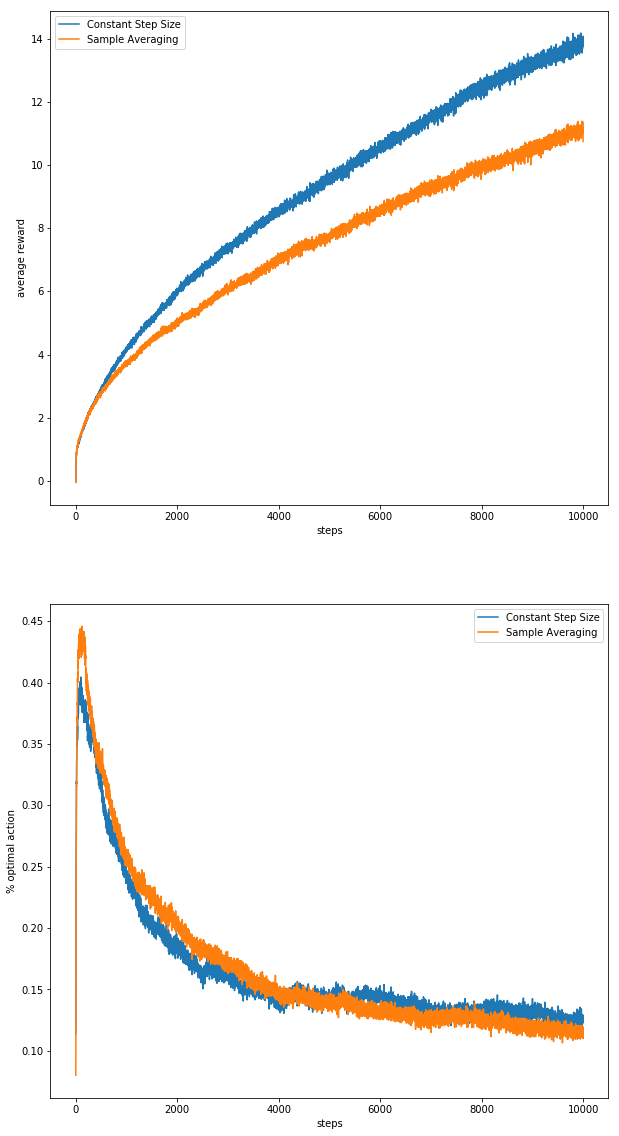

In [82]:
if __name__ == '__main__':
    exercise_2_5()